In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')
train_data.head(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
test_data.head(5)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [4]:
train_data.describe(include='all')

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3.116945e+06,3116945,3.116941e+06,3116905,2445922,3116933,3116937,2593009,1858510,3116888,...,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,...,38,60,59,22,24,23,40,32,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,...,b,s,w,u,w,f,f,k,d,a
freq,NaN,1705396,NaN,1436026,460777,1359542,2569743,646034,1331054,931538,...,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing_val_count_by_column=train_data.isnull().sum()
missing_val_count_by_column1=test_data.isnull().sum()
missing_val_train = missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_test = missing_val_count_by_column1[missing_val_count_by_column1 > 0]
missing_value_df = pd.DataFrame(missing_val_train)
missing_value_df['test_data'] = missing_val_test
missing_value_df

,0,test_data
cap-diameter,4,7
cap-shape,40,31
cap-surface,671023,446904
cap-color,12,13
does-bruise-or-bleed,8,10
gill-attachment,523936,349821
gill-spacing,1258435,839595
gill-color,57,49
stem-root,2757023,1838012
stem-surface,1980861,1321488


In [6]:
# percentage of missing columns
Missing = train_data.isna().mean()*100
Missing_col = Missing[Missing>0]
Missing_col.sort_values(ascending=False,inplace =True)
Missing_col

veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0.001444
cap-shape                0.001283
stem-color               0.001219
has-ring                 0.000770
cap-color                0.000385
does-bruise-or-bleed     0.000257
cap-diameter             0.000128
dtype: float64

In [7]:
display(train_data.columns)
display(train_data.shape)

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

(3116945, 22)

In [8]:
display(test_data.columns)
display(test_data.shape)

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

(2077964, 21)

In [9]:
cols_above_60percent_missing_val = ['stem-root','stem-surface','veil-type','veil-color','spore-print-color']
train_data = train_data.drop(cols_above_60percent_missing_val, axis=1)
display(train_data.columns)
display(train_data.shape)

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

(3116945, 17)

In [10]:
test_data = test_data.drop(cols_above_60percent_missing_val, axis=1)
test_data.shape

(2077964, 16)

In [11]:
train_data['cap-shape'].unique()
# it seems there are inconsistencies in data entry.

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
       'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [12]:
train_data['gill-color'].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', '3.45', 'z', '5', '3.39', 'season', 'h', 'x', 's', '4',
       'class', 'c', 'm', 'spacing', '0.92', nan, '18.12', 'l', 'does w',
       'a', '7.59', '8.06', '6.19', 'has-ring', '4.49', '9.46', '5.01',
       'ring-type', '3.4', 'i', '17', '10.07', 'stem-root', '20.6',
       'spore-print-color', '18.03', 'does-bruise-or-bleed', '8.83',
       'habitat', '10.21', '4.64', '6.4', 'is y', 'e y', '1.91', 'does n',
       '16.41', '6.41', 'veil-type', '20.44', '8.37'], dtype=object)

In [13]:
train_data['season'].unique()

array(['a', 'w', 'u', 's'], dtype=object)

In [14]:
# categorical columns to preprocess
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment'
                      ,'gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season'] 
# numerical columns to preprocess
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

In [15]:
cols_to_clean = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment',
                'gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat'] 

In [16]:
# let's define valid categories for each column
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']}

In [17]:
# Replace unexpected values with NaN
for col in cols_to_clean:
    train_data[col] = train_data[col].apply(lambda x: x if x in valid_categories[col] else np.nan)
    test_data[col] = test_data[col].apply(lambda x: x if x in valid_categories[col] else np.nan)

In [18]:
for col in numerical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(test_data[col].median())

In [19]:
for col in categorical_columns:
    mode_train = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_train)
    mode_test = test_data[col].mode()[0]
    test_data[col] = test_data[col].fillna(mode_test)

In [20]:
print("There are", train_data.isnull().sum().sum(), "missing value in train_data")
print("There are", test_data.isnull().sum().sum(), "missing value in test_data")

There are 0 missing value in train_data
There are 0 missing value in test_data


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

In [22]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in categorical_columns:
    train_data[col] = train_data[col].astype(str)
    train_data[col] = LE.fit_transform(train_data[col])
    test_data[col] = test_data[col].astype(str)
    test_data[col] = LE.fit_transform(test_data[col])

In [23]:
train_data['class'] = LE.fit_transform(train_data['class'])
train_data['class']

0          0
1          1
2          0
3          0
4          0
          ..
3116940    0
3116941    0
3116942    1
3116943    0
3116944    1
Name: class, Length: 3116945, dtype: int64

In [24]:
# feature and target selection
cols = numerical_columns + categorical_columns
X = train_data[cols]
y = train_data['class']
X.head(5)

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,0.534605,-0.680926,0.523282,2,2,8,0,0,0,3,3,0,1,0,0
1,-0.386405,-0.577213,-0.577333,6,0,5,0,0,0,2,2,1,3,0,3
2,0.135286,0.185819,-0.151169,2,2,0,0,3,0,3,1,0,1,3,3
3,-0.521659,-0.810568,-0.571157,2,3,2,0,2,0,0,3,0,1,0,2
4,-0.098724,-1.103187,-0.345105,6,1,9,0,1,0,3,3,0,1,1,0


In [25]:
display(X.shape)
display(y.shape)

(3116945, 15)

(3116945,)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'cap-diameter distribution')

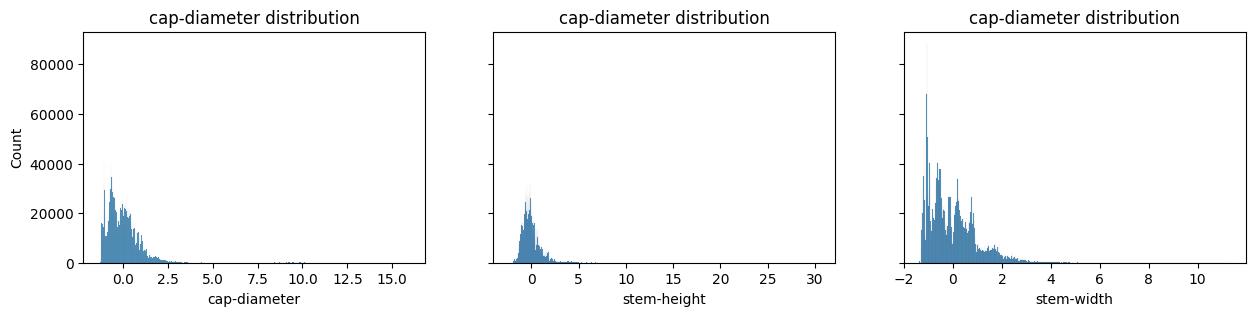

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
sns.histplot(X['cap-diameter'],ax = ax1).set_title('cap-diameter distribution')
sns.histplot(X['stem-height'], ax = ax2).set_title('cap-diameter distribution')
sns.histplot(X['stem-width'], ax = ax3).set_title('cap-diameter distribution')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,stratify=y, random_state =365)

In [28]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(colsample_bylevel= 0.9,
                    learning_rate=0.2,
                    colsample_bytree = 0.8, 
                    gamma=0.1,
                    max_depth= 10,
                    min_child_weight= 1,
                    n_estimators= 250,
                    nthread= 4,
                    random_state= 365)
model_xgb.fit(X_train, y_train)

pred_2 = model_xgb.predict(X_valid)

accuracy = accuracy_score(y_valid, pred_2)
classification_rep = classification_report(y_valid, pred_2)

print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.987

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [29]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_valid, pred_2)
print(f'Matthews Correlation Coefficient (MCC): {mcc}')

Matthews Correlation Coefficient (MCC): 0.9736135047413904


In [30]:
# let's train the whole dataset
model_xgb.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [31]:
test_data.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,3116945,0.498097,6,2,4,1,0,0,3,1.772335,0.737221,3,1,1,0,0
1,3116946,0.126735,3,2,5,0,0,0,3,-1.880901,-0.049181,1,0,1,0,0
2,3116947,-0.919055,0,2,4,0,0,0,2,-0.061693,-0.988666,1,0,1,0,1
3,3116948,-0.605318,6,2,4,0,2,0,2,-0.506306,-0.325718,3,1,3,0,2
4,3116949,-0.029067,6,0,10,0,0,0,3,0.142088,0.315009,4,1,1,0,2


In [32]:
test_data = test_data[cols]
test_data.shape

(2077964, 15)

In [33]:
prediction = model_xgb.predict(test_data)
prediction

array([0, 1, 1, ..., 1, 0, 0])

In [34]:
sample_submission.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [35]:
prediction_class = LE.inverse_transform(prediction)
sample_submission['class'] = prediction_class
sample_submission.head(5)

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [36]:
sample_submission.to_csv("submission.csv", index=False)